In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data  test  train  val


In [ ]:
# os.chdir("drive/My Drive")

In [ ]:
!ls 

drive  sample_data  test  train  val


In [ ]:
!unzip "drive/My Drive/train.zip"

Archive:  drive/My Drive/train.zip
replace train/pos/109819.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip "drive/My Drive/val.zip"

Archive:  drive/My Drive/val.zip
replace val/pos/60299.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip "drive/My Drive/test.zip"

Archive:  drive/My Drive/test.zip
replace test/pos/26680.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
base_dir = 'train'
train_ads_dir = os.path.join(base_dir, 'pos')

In [ ]:
print(os.path.abspath(os.getcwd()))

/content


In [ ]:
train_non_ads_dir_sample = os.path.join(base_dir, 'neg')

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


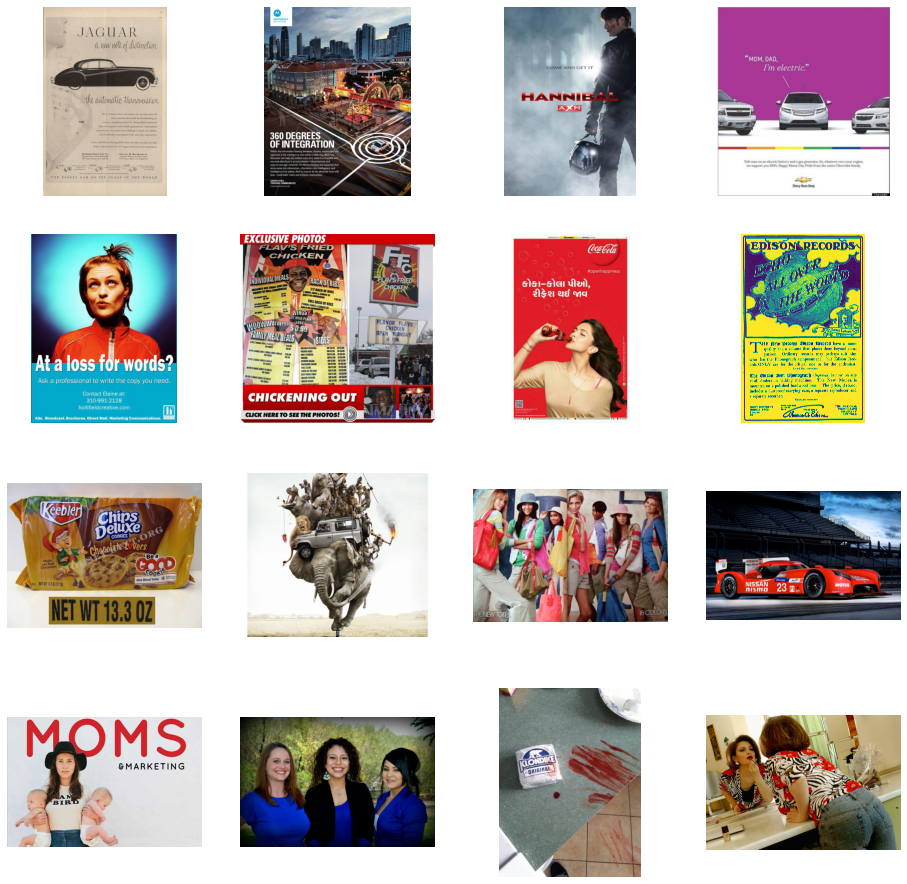

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_ads_fnames = os.listdir( train_ads_dir )
train_non_ads_fnames = os.listdir( train_non_ads_dir_sample )


next_ad_pix = [os.path.join(train_ads_dir, fname) 
                for fname in train_ads_fnames[ pic_index-8:pic_index] 
               ]

next_non_ad_pix = [os.path.join(train_non_ads_dir_sample, fname) 
                for fname in train_non_ads_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_ad_pix+next_non_ad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
##Split into train/test/val

# positives = []
# for file in os.walk('/root/Project/train/pos'):
#     positives.append(file)

In [ ]:
# print(positives)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_dir = ''

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# Directory with our training ad pictures
train_ads_dir = os.path.join(train_dir, 'pos')

# Directory with our training dog pictures
train_noads_dir = os.path.join(train_dir, 'neg')

# Directory with our validation ad pictures
validation_ads_dir = os.path.join(validation_dir, 'pos')

# Directory with our validation dog pictures
validation_noads_dir = os.path.join(validation_dir, 'neg')

In [ ]:
train_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_gen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 47057 images belonging to 2 classes.
Found 15685 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
# base_model.add(Dropout(0.5))
base_model.add(Dense(1, activation='sigmoid'))

In [ ]:
import tensorflow as tf
import keras

In [ ]:
opt = keras.optimizers.SGD(learning_rate = 0.0001)

In [ ]:
from tensorflow.keras.metrics import TruePositives, TrueNegatives, FalseNegatives, FalsePositives,Recall , Precision, BinaryAccuracy

In [ ]:
 base_model.compile(optimizer = opt , loss = 'binary_crossentropy', metrics = [
        BinaryAccuracy(),
        TruePositives(),
        TrueNegatives(),
        FalsePositives(),
        FalseNegatives(),
        Precision(),
        Recall()
    ])

In [ ]:
resnet_history = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 1.3916 - binary_accuracy: 0.7245 - true_positives: 1372.0000 - true_negatives: 77.0000 - false_positives: 262.0000 - false_negatives: 289.0000 - precision: 0.8397 - recall: 0.8260

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:2797: DecompressionBombWarning: Image size (141750000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


100/100 [==============================] - 374s 4s/step - loss: 1.3916 - binary_accuracy: 0.7245 - true_positives: 1372.0000 - true_negatives: 77.0000 - false_positives: 262.0000 - false_negatives: 289.0000 - precision: 0.8397 - recall: 0.8260 - val_loss: 1.3220 - val_binary_accuracy: 0.7904 - val_true_positives: 12056.0000 - val_true_negatives: 341.0000 - val_false_positives: 2378.0000 - val_false_negatives: 910.0000 - val_precision: 0.8353 - val_recall: 0.9298
Epoch 2/10
100/100 [==============================] - 339s 3s/step - loss: 1.1249 - binary_accuracy: 0.7580 - true_positives: 1428.0000 - true_negatives: 88.0000 - false_positives: 260.0000 - false_negatives: 224.0000 - precision: 0.8460 - recall: 0.8644 - val_loss: 1.0359 - val_binary_accuracy: 0.7875 - val_true_positives: 11653.0000 - val_true_negatives: 699.0000 - val_false_positives: 2020.0000 - val_false_negatives: 1313.0000 - val_precision: 0.8523 - val_recall: 0.8987
Epoch 3/10
100/100 [==============================] - 

In [ ]:
base_model.save('resnet_new.h5')

In [ ]:
from keras.models import load_model

In [ ]:
test_gen = ImageDataGenerator()
test_dir = 'test'
test_generator = test_gen.flow_from_directory( test_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 15687 images belonging to 2 classes.


In [ ]:
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

In [ ]:
saved_model = load_model("resnet_new.h5")

# Evaluate on test data
scores = saved_model.evaluate(test_generator)
print("%s%s: %.2f%%" % ("evaluate ",saved_model.metrics_names[1], scores[1]*100))

785/785 [==============================] - 307s 389ms/step - loss: 0.6787 - binary_accuracy: 0.8133 - true_positives: 11227.0000 - true_negatives: 1532.0000 - false_positives: 1188.0000 - false_negatives: 1740.0000 - precision: 0.9043 - recall: 0.8658
evaluate binary_accuracy: 81.33%


        Metric              Value
0       0.6787166595458984  loss
1       0.813348650932312   binary_accuracy
2       11227.0             true_positives
3       1532.0              true_negatives
4       1188.0              false_positives
5       1740.0              false_negatives
6       0.9043093323707581  precision
7       0.8658131957054138  recall
[0.6787166595458984, 0.813348650932312, 11227.0, 1532.0, 1188.0, 1740.0, 0.9043093323707581, 0.8658131957054138]


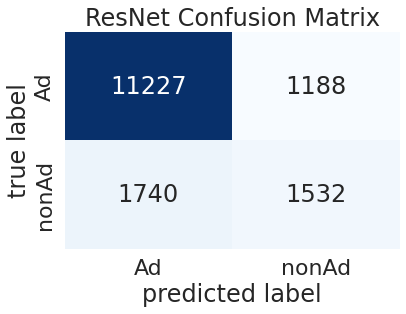

In [ ]:
import numpy as np
import seaborn as sns; sns.set_theme()

fmt = '{:<8}{:<20}{}'

print(fmt.format('', 'Metric', 'Value'))
for i, (a, b) in enumerate(zip(scores, saved_model.metrics_names)):
    print(fmt.format(i, a, b))

sns.set(font_scale=2)

def plot_matrix(cm, classes, title):
  ax = sns.heatmap(cm, cmap="Blues", annot=True, xticklabels=classes, yticklabels=classes, cbar=False, fmt='g')
  ax.set(title=title, xlabel="predicted label", ylabel="true label")

print(scores)
    
cm = np.array([[scores[2],scores[4]],[scores[5],scores[3]]])
classes = ['Ad', 'nonAd']
title = "ResNet Confusion Matrix"

plot_matrix(cm, classes, title)

In [ ]:
from sklearn.metrics import confusion_matrix

# y_pred = saved_model.predict(test_generator)
y_pred = saved_model.predict(test_generator)

In [ ]:
import numpy as np

In [ ]:
y_pred = np.rint(y_pred)
print(confusion_matrix(test_generator.classes, y_pred))

In [ ]:
print(test_generator.classes)
print(test_generator.class_indices.keys())

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_generator.classes, y_pred))